In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 9.0 MB/s eta 0:00:00


In [20]:
!pip install infercnvpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.5 MB/s eta 0:00:00


In [21]:
import csv
import gzip
import os
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# For GSEA, you might use gseapy
import gseapy
import infercnvpy as cnv

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
adata = sc.read_h5ad('/content/drive/MyDrive/ALSF/SCPCP000023/SCPCS000758/SCPCL001120_processed_rna.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 9836 × 60319
    obs: 'barcodes', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'total', 'prob_compromised', 'miQC_pass', 'scpca_filter', 'sizeFactor', 'cluster', 'singler_celltype_ontology', 'singler_celltype_annotation', 'cellassign_celltype_annotation', 'cellassign_celltype_ontology', 'cellassign_max_prediction', 'consensus_celltype_annotation', 'consensus_celltype_ontology', 'library_id', 'sample_id', 'scpca_project_id', 'submitter_id', 'participant_id', 'submitter', 'age', 'age_timing', 'sex', 'diagnosis', 'subdiagnosis', 'tissue_location', 'disease_timing', 'organism', 'is_xenograft', 'is_cell_line', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'is_primary_data'
    var: 'gene_ids', 'gene_symbol', 'mean', 'detected', 'fe

# Step 1: Initial Review and Preliminary Assessment

Step 1.1: Visualizing existing clusters and annotations


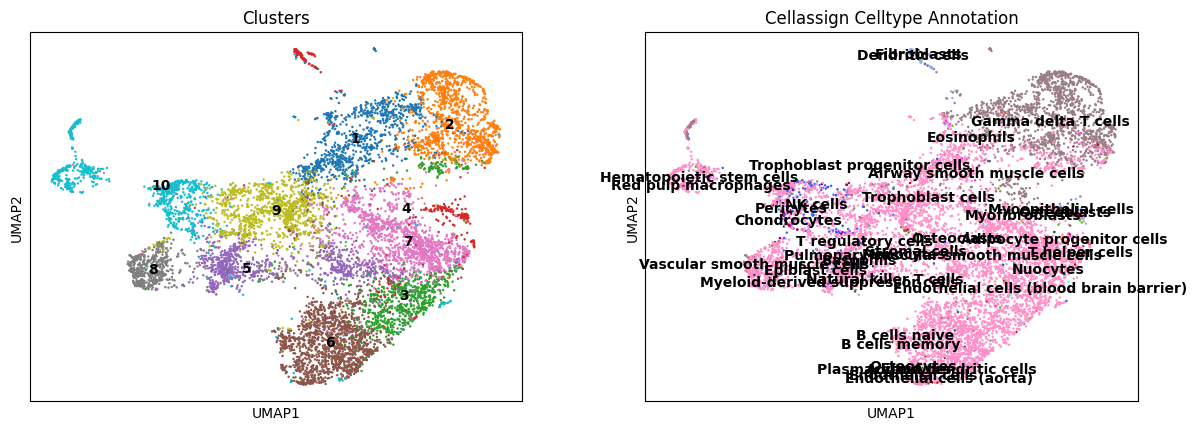

In [11]:
# Review existing clusters and annotations
# Visualize UMAP colored by existing annotations (e.g., consensus_celltype_annotation)
print("Step 1.1: Visualizing existing clusters and annotations")
sc.pl.umap(adata, color=['cluster', 'cellassign_celltype_annotation'], legend_loc='on data', title=['Clusters', 'Cellassign Celltype Annotation'])

Step 1.2: Performing differential gene expression for initial clusters


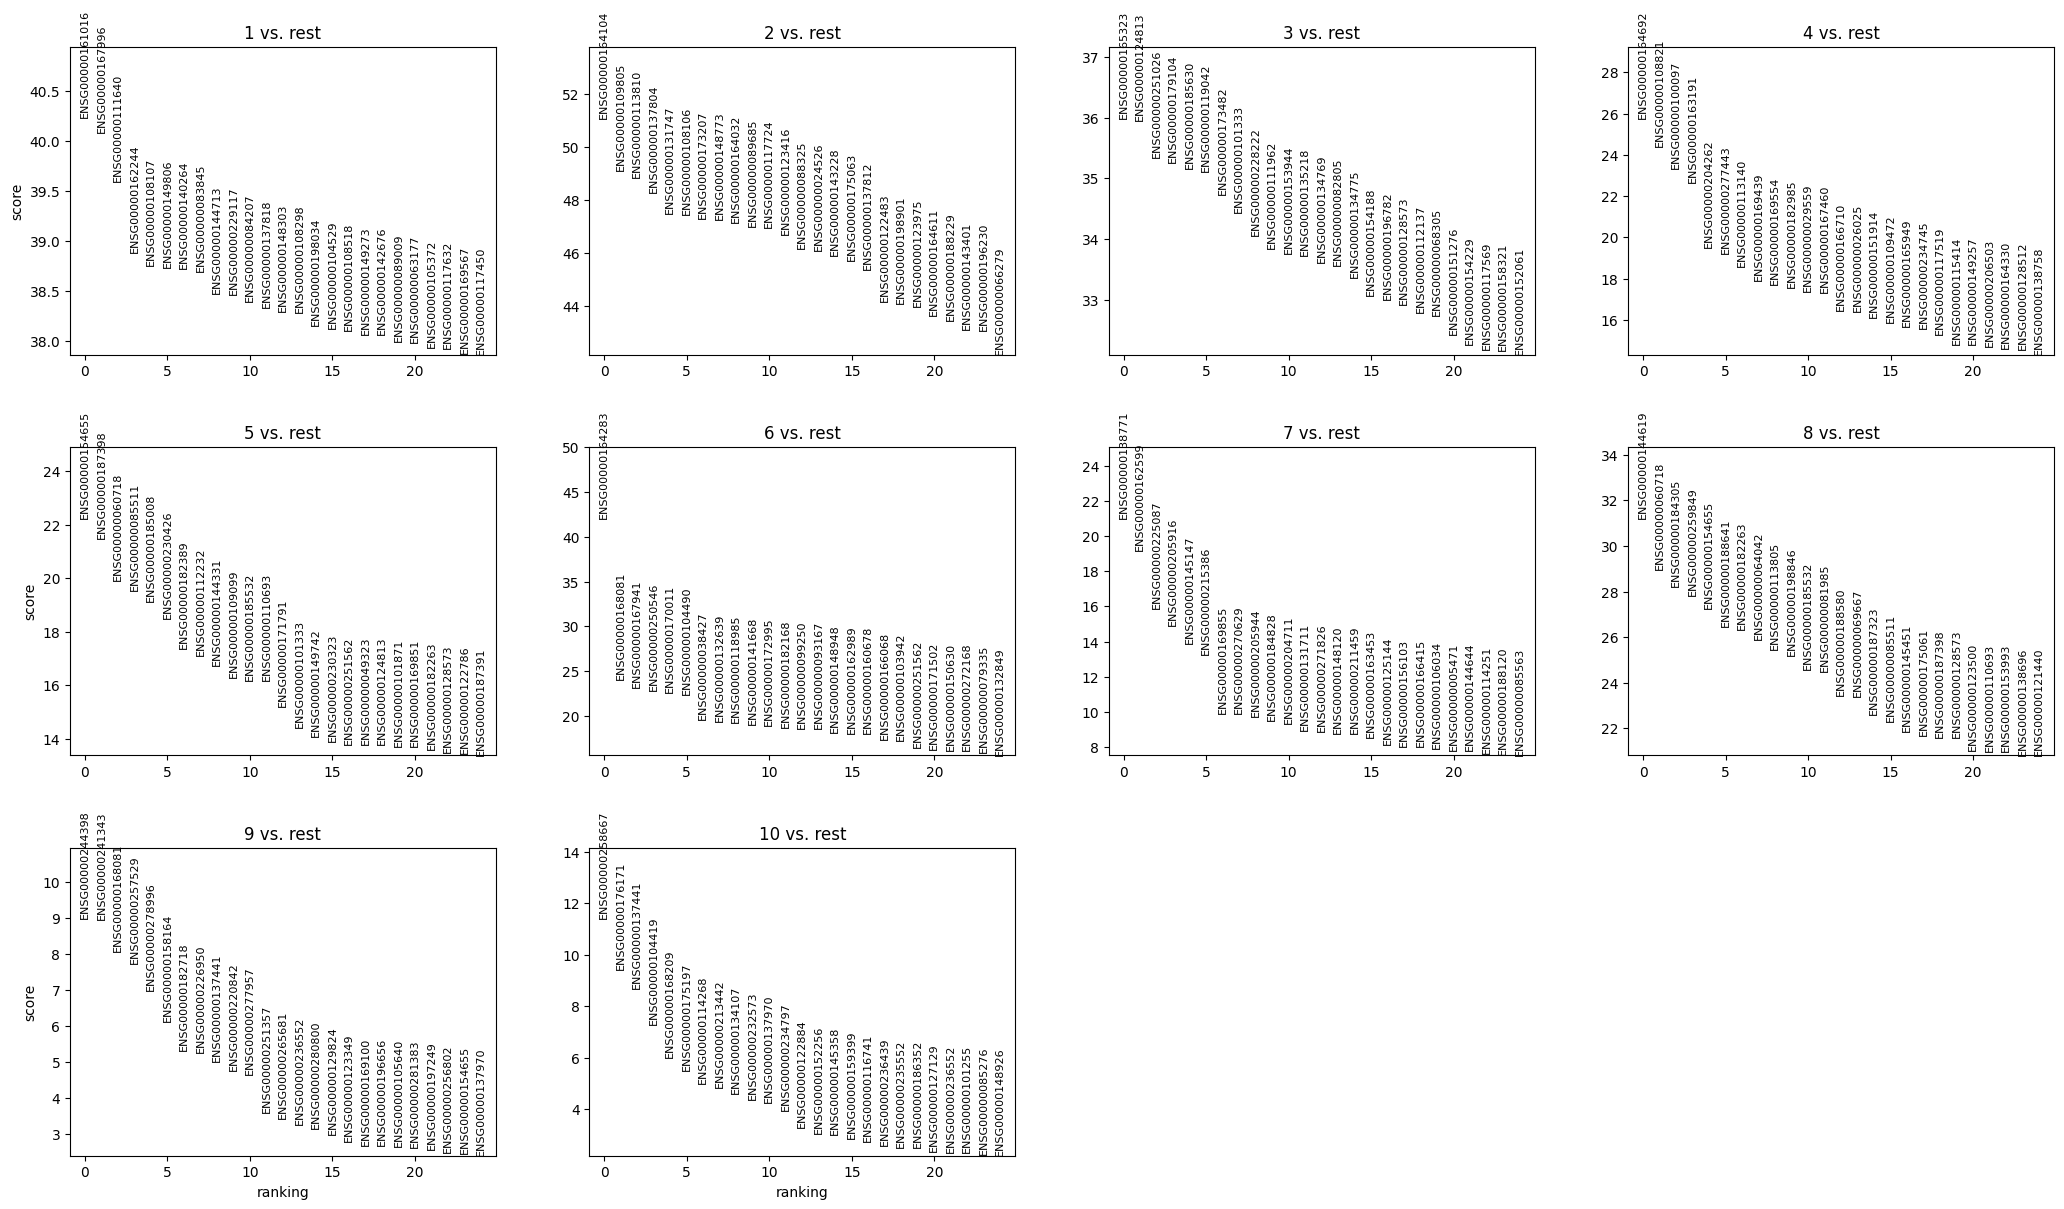

In [13]:
# Perform differential gene expression analysis for initial clusters
# This uses the 'cluster' column in adata.obs
print("Step 1.2: Performing differential gene expression for initial clusters")
sc.tl.rank_genes_groups(adata, 'cluster', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, title="Top 25 DEGs per Cluster")

In [14]:
# You can access the DGE results as a pandas DataFrame:
dge_results = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
print(dge_results.head())

                 1                2                3                4  \
0  ENSG00000161016  ENSG00000164104  ENSG00000165323  ENSG00000164692   
1  ENSG00000167996  ENSG00000109805  ENSG00000124813  ENSG00000108821   
2  ENSG00000111640  ENSG00000113810  ENSG00000251026  ENSG00000100097   
3  ENSG00000162244  ENSG00000137804  ENSG00000179104  ENSG00000163191   
4  ENSG00000108107  ENSG00000131747  ENSG00000185630  ENSG00000204262   

                 5                6                7                8  \
0  ENSG00000154655  ENSG00000164283  ENSG00000138771  ENSG00000144619   
1  ENSG00000187398  ENSG00000168081  ENSG00000162599  ENSG00000060718   
2  ENSG00000060718  ENSG00000167941  ENSG00000225087  ENSG00000184305   
3  ENSG00000085511  ENSG00000250546  ENSG00000205916  ENSG00000259849   
4  ENSG00000185008  ENSG00000170011  ENSG00000145147  ENSG00000154655   

                 9               10  
0  ENSG00000244398  ENSG00000258667  
1  ENSG00000241343  ENSG00000176171  
2  ENSG0

In [15]:
# Option 2: If adata.var_names are Ensembl IDs and gene symbols are in adata.var['gene_symbol']
osteosarcoma_marker_symbols = ['COL1A1', 'CXCL12', 'MEPE', 'COL2A1']
# Get the var_names (e.g. Ensembl IDs) for these symbols
# Create a mapping from symbol to var_name if needed, or directly use boolean indexing
# This assumes 'gene_symbol' is a column in adata.var
osteosarcoma_markers_present = adata.var_names[adata.var['gene_symbol'].isin(osteosarcoma_marker_symbols)].tolist()

Step 1.3: Assessing expression of general osteosarcoma markers


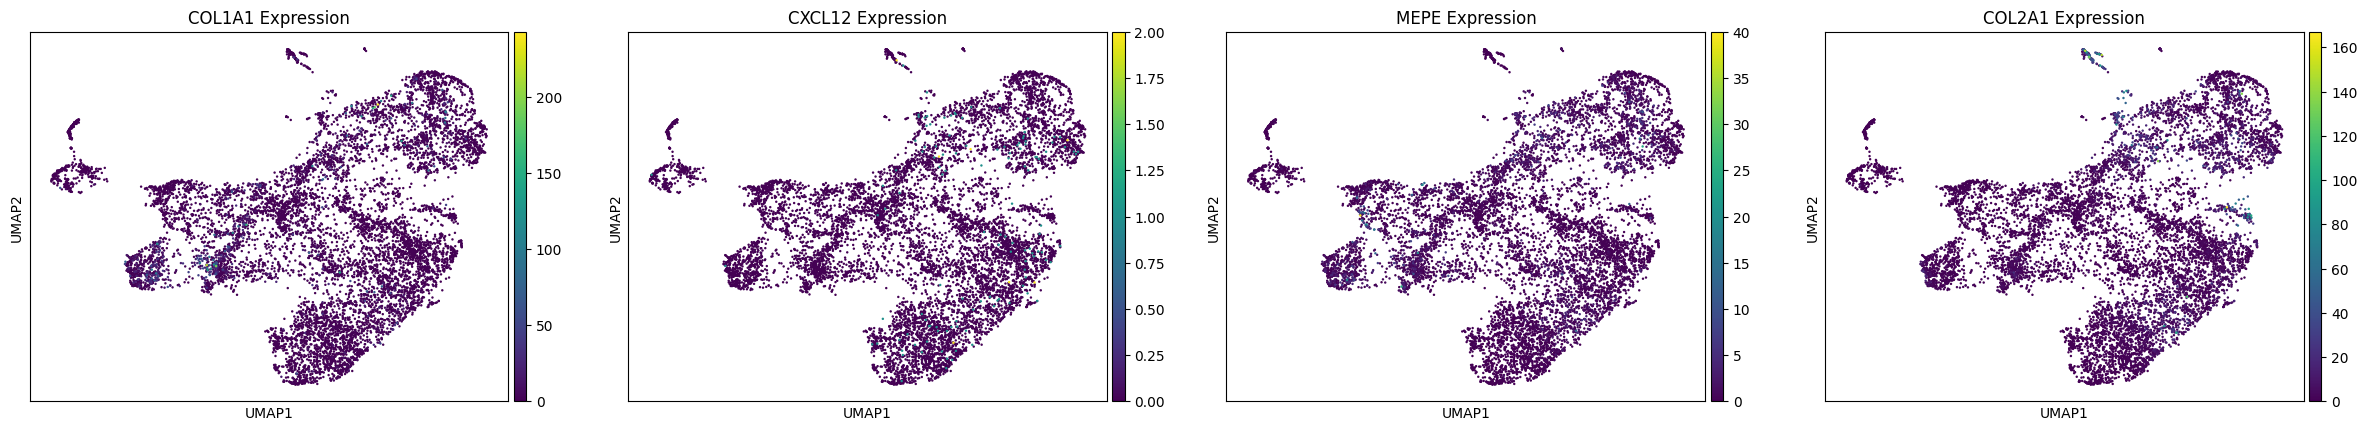

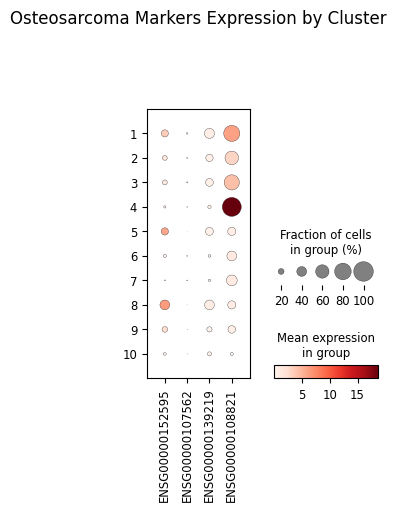

In [17]:
# Assess expression of general osteosarcoma markers
if osteosarcoma_markers_present:
    print("Step 1.3: Assessing expression of general osteosarcoma markers")
    sc.pl.umap(adata, color=osteosarcoma_markers_present, title=[f"{marker} Expression" for marker in osteosarcoma_marker_symbols if adata.var_names[adata.var['gene_symbol'] == marker][0] in osteosarcoma_markers_present])
    sc.pl.dotplot(adata, osteosarcoma_markers_present, groupby='cluster', title="Osteosarcoma Markers Expression by Cluster")
else:
    print("Step 1.3: None of the specified osteosarcoma markers were found in the data using adata.var['gene_symbol'].")

Assessing expression of osteoblastic markers


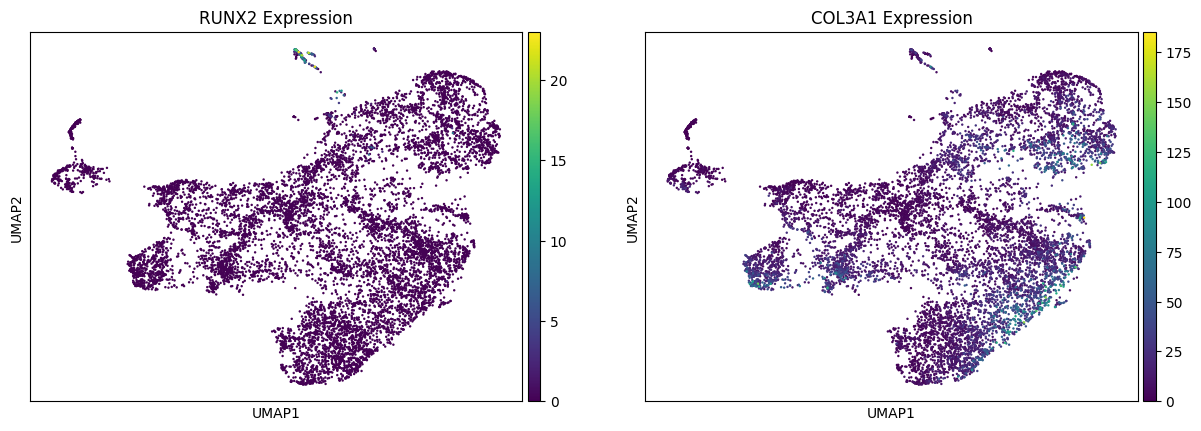

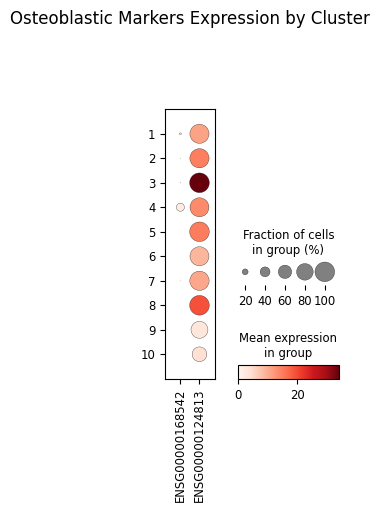

Assessing expression of chondroblastic markers


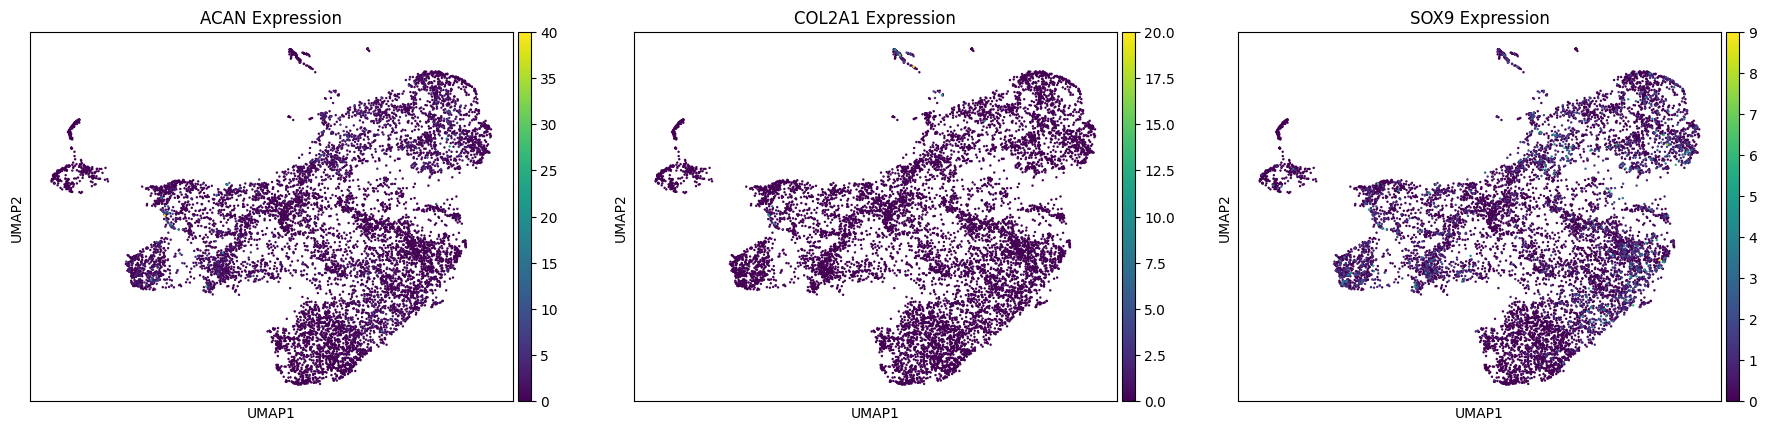

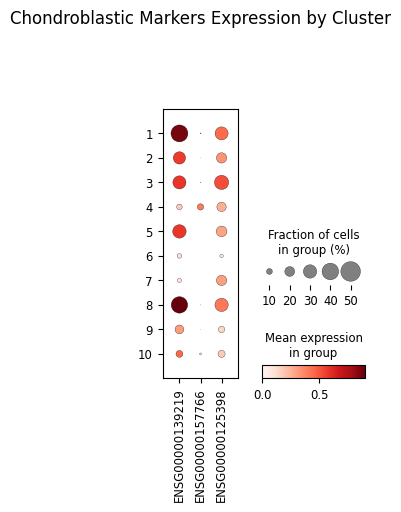

In [19]:
# Assess expression of osteoblastic or chondroblastic subtype markers
osteoblastic_markers_symbols = ['RUNX2', 'COL3A1']
chondroblastic_markers_symbols = ['ACAN', 'COL2A1', 'SOX9']

osteoblastic_markers_present = adata.var_names[adata.var['gene_symbol'].isin(osteoblastic_markers_symbols)].tolist()
chondroblastic_markers_present = adata.var_names[adata.var['gene_symbol'].isin(chondroblastic_markers_symbols)].tolist()

if osteoblastic_markers_present:
    print("Assessing expression of osteoblastic markers")
    sc.pl.umap(adata, color=osteoblastic_markers_present, title=[f"{marker} Expression" for marker in osteoblastic_markers_symbols if adata.var_names[adata.var['gene_symbol'] == marker][0] in osteoblastic_markers_present])
    sc.pl.dotplot(adata, osteoblastic_markers_present, groupby='cluster', title="Osteoblastic Markers Expression by Cluster")
if chondroblastic_markers_present:
    print("Assessing expression of chondroblastic markers")
    sc.pl.umap(adata, color=chondroblastic_markers_present, title=[f"{marker} Expression" for marker in chondroblastic_markers_symbols if adata.var_names[adata.var['gene_symbol'] == marker][0] in chondroblastic_markers_present])
    sc.pl.dotplot(adata, chondroblastic_markers_present, groupby='cluster', title="Chondroblastic Markers Expression by Cluster")

# Step 2: Prepare Gene Order File for InferCNV

In [23]:
external_gene_order_df = pd.read_csv('/content/drive/MyDrive/ALSF/gencode_v19_gene_pos.txt', sep='\t', header=None, names=['gene_symbol_external', 'chromosome', 'start', 'end'])

In [24]:
external_gene_order_df.head()

gene_symbol_external chromosome  start    end
0              DDX11L1       chr1  11869  14412
1               WASH7P       chr1  14363  29806
2           MIR1302-11       chr1  29554  31109
3              FAM138A       chr1  34554  36081
4               OR4G4P       chr1  52473  54936

In [25]:
gene_map_df = adata.var[['gene_symbol']].copy()

In [27]:
gene_map_df = gene_map_df.reset_index()
gene_map_df.rename(columns={gene_map_df.columns[0]: 'Ensembl_ID'}, inplace=True)
gene_map_df.head()

Ensembl_ID  gene_symbol
0  ENSG00000223972      DDX11L1
1  ENSG00000243485  MIR1302-2HG
2  ENSG00000284332    MIR1302-2
3  ENSG00000268020       OR4G4P
4  ENSG00000240361      OR4G11P

In [28]:
# Clean the map: drop rows with missing gene symbols, drop duplicate symbols (keeping first Ensembl ID)
gene_map_df.dropna(subset=['gene_symbol'], inplace=True)
gene_map_df.drop_duplicates(subset=['gene_symbol'], keep='first', inplace=True) # Important for a clean merge

In [29]:
gene_map_df.shape

(39162, 2)

In [30]:
# Merge based on gene symbols from the external file and our map
merged_gene_order_df = pd.merge(
    external_gene_order_df,
    gene_map_df,
    left_on='gene_symbol_external',
    right_on='gene_symbol',
    how='inner' # Keep only genes present in both
)
print(f"Merged gene order data. Shape: {merged_gene_order_df.shape}")
print(merged_gene_order_df.head())

Merged gene order data. Shape: (30815, 6)
  gene_symbol_external chromosome  start    end       Ensembl_ID gene_symbol
0              DDX11L1       chr1  11869  14412  ENSG00000223972     DDX11L1
1               WASH7P       chr1  14363  29806  ENSG00000227232      WASH7P
2              FAM138A       chr1  34554  36081  ENSG00000237613     FAM138A
3               OR4G4P       chr1  52473  54936  ENSG00000268020      OR4G4P
4              OR4G11P       chr1  62948  63887  ENSG00000240361     OR4G11P


In [31]:
final_gene_order_for_infercnpy_df = merged_gene_order_df[['Ensembl_ID', 'chromosome', 'start', 'end']].copy()
# Ensure Ensembl_IDs are unique (should be if gene_map_df was correctly prepared and Ensembl_IDs in adata are unique)
final_gene_order_for_infercnpy_df.drop_duplicates(subset=['Ensembl_ID'], keep='first', inplace=True)

In [32]:
# Sort by chromosome and start position (critical for infercnpy)
# Handle chromosome strings like 'chrX', 'chrY', 'chrM' by converting 'chr' prefix to numerical for sorting
final_gene_order_for_infercnpy_df['chromosome_numerical'] = final_gene_order_for_infercnpy_df['chromosome'].astype(str).str.replace('chr', '')
# Replace X, Y, M with high numbers for sorting after numerical chromosomes
replace_map = {'X': 100, 'Y': 101, 'M': 102, 'MT': 102} # MT for mitochondrial
for k, v in replace_map.items():
    final_gene_order_for_infercnpy_df['chromosome_numerical'] = final_gene_order_for_infercnpy_df['chromosome_numerical'].replace(k, str(v))

In [33]:
# Attempt to convert to numeric, coercing errors for any non-standard chromosome names
final_gene_order_for_infercnpy_df['chromosome_numerical'] = pd.to_numeric(final_gene_order_for_infercnpy_df['chromosome_numerical'], errors='coerce')
final_gene_order_for_infercnpy_df.dropna(subset=['chromosome_numerical'], inplace=True) # Drop if not convertible

final_gene_order_for_infercnpy_df = final_gene_order_for_infercnpy_df.sort_values(
    by=['chromosome_numerical', 'start']
).drop(columns=['chromosome_numerical'])

In [39]:
# Save to a temporary file (tab-separated, no header, specific columns)
processed_gene_order_file_path = "/content/drive/MyDrive/ALSF/processed_gene_order_for_infercnpy.txt"
final_gene_order_for_infercnpy_df[['Ensembl_ID', 'chromosome', 'start', 'end']].to_csv(
    processed_gene_order_file_path, sep='\t', index=False, header=False
)
print(f"Processed gene order file saved to: {processed_gene_order_file_path}. Shape: {final_gene_order_for_infercnpy_df.shape}")
print(final_gene_order_for_infercnpy_df.head())

Processed gene order file saved to: /content/drive/MyDrive/ALSF/processed_gene_order_for_infercnpy.txt. Shape: (30815, 4)
        Ensembl_ID chromosome  start    end
0  ENSG00000223972       chr1  11869  14412
1  ENSG00000227232       chr1  14363  29806
2  ENSG00000237613       chr1  34554  36081
3  ENSG00000268020       chr1  52473  54936
4  ENSG00000240361       chr1  62948  63887


# Step 3: Define Reference Cell Types

In [36]:
reference_cell_types = adata.obs['cellassign_celltype_annotation'].unique()

In [40]:
adata.obs['cnv_ref_group'] = adata.obs['cellassign_celltype_annotation'].astype(str)
available_ref_types = [ct for ct in reference_cell_types if ct in adata.obs['cnv_ref_group'].unique()]
print(f"Using the following cell types as reference: {available_ref_types}")

Using the following cell types as reference: ['Gamma delta T cells', 'Pulmonary vascular smooth muscle cells', 'NK cells', 'Fibroblasts', 'Monocytes', 'Nuocytes', 'Airway smooth muscle cells', 'Osteoblasts', 'Myofibroblasts', 'Osteoclasts', 'Chondrocytes', 'Epiblast cells', 'Natural killer T cells', 'Trophoblast progenitor cells', 'Basophils', 'Trophoblast cells', 'Myeloid-derived suppressor cells', 'Stromal cells', 'Adipocytes', 'Myoepithelial cells', 'Vascular smooth muscle cells', 'Osteocytes', 'Plasmacytoid dendritic cells', 'Endothelial cells (aorta)', 'Endothelial cells (blood brain barrier)', 'Dendritic cells', 'Pericytes', 'T helper cells', 'Eosinophils', 'Red pulp macrophages', 'B cells memory', 'T regulatory cells', 'B cells naive', 'Endothelial cells', 'Adipocyte progenitor cells', 'Hematopoietic stem cells']


# Step 4: Run Infercnpy

In [51]:
# Subset AnnData to genes that are present in our final_gene_order_for_infercnpy_df
# These are the genes for which we have genomic coordinates.
common_genes_with_coords = final_gene_order_for_infercnpy_df['Ensembl_ID'].unique().tolist()
common_genes_in_adata = [gene for gene in adata.var_names if gene in common_genes_with_coords]

In [52]:
adata_subset_for_cnv = adata[:, common_genes_in_adata].copy()
print(f"adata_subset_for_cnv created with {adata_subset_for_cnv.n_vars} genes and {adata_subset_for_cnv.n_obs} cells.")

adata_subset_for_cnv created with 30815 genes and 9836 cells.


In [56]:
adata_subset_for_cnv.var_names

Index(['ENSG00000223972', 'ENSG00000284332', 'ENSG00000268020',
       'ENSG00000240361', 'ENSG00000186092', 'ENSG00000233750',
       'ENSG00000269732', 'ENSG00000233653', 'ENSG00000225972',
       'ENSG00000225630',
       ...
       'ENSG00000235412', 'ENSG00000183795', 'ENSG00000234583',
       'ENSG00000129845', 'ENSG00000229302', 'ENSG00000226362',
       'ENSG00000226092', 'ENSG00000225491', 'ENSG00000185894',
       'ENSG00000228296'],
      dtype='object', length=30815)

In [53]:
# Add chromosome, start, and end information to adata_subset_for_cnv.var
# The gene order DataFrame needs to be indexed by 'Ensembl_ID' to align with adata_subset_for_cnv.var_names
gene_order_info_to_add = final_gene_order_for_infercnpy_df.set_index('Ensembl_ID')

In [54]:
# Keep only the coordinate columns needed, ensure they are present
coordinate_cols = ['chromosome', 'start', 'end']
for col in coordinate_cols:
    if col not in gene_order_info_to_add.columns:
        raise ValueError(f"Column '{col}' is missing from the gene order information DataFrame.")

In [57]:
# Join the coordinate information. This aligns based on the index (Ensembl_ID).
adata_subset_for_cnv.var = adata_subset_for_cnv.var.join(gene_order_info_to_add[coordinate_cols])

In [58]:
# Verify that the columns were added and populated
print("Verifying .var columns after adding coordinates:")
print(adata_subset_for_cnv.var.head())
if adata_subset_for_cnv.var['chromosome'].isnull().any() or \
   adata_subset_for_cnv.var['start'].isnull().any() or \
   adata_subset_for_cnv.var['end'].isnull().any():
    print("Warning: Some genes in adata_subset_for_cnv.var have missing chromosome/start/end information after join.")
    print(adata_subset_for_cnv.var[adata_subset_for_cnv.var['chromosome'].isnull()].head())
    # Consider dropping these genes or investigating the merge if this happens unexpectedly
    # adata_subset_for_cnv = adata_subset_for_cnv[:, adata_subset_for_cnv.var['chromosome'].notnull()].copy()
    # print(f"Subsetted further to {adata_subset_for_cnv.n_vars} genes with complete coordinate info.")


Verifying .var columns after adding coordinates:
                        gene_ids gene_symbol     mean  detected  \
ENSG00000223972  ENSG00000223972     DDX11L1  0.00061     0.061   
ENSG00000284332  ENSG00000284332   MIR1302-2  0.00000     0.000   
ENSG00000268020  ENSG00000268020      OR4G4P  0.00000     0.000   
ENSG00000240361  ENSG00000240361     OR4G11P  0.00000     0.000   
ENSG00000186092  ENSG00000186092       OR4F5  0.00000     0.000   

                 feature_is_filtered  highly_variable chromosome  start    end  
ENSG00000223972                False            False       chr1  11869  14412  
ENSG00000284332                False            False       chr9  27657  30891  
ENSG00000268020                False            False       chr1  52473  54936  
ENSG00000240361                False            False       chr1  62948  63887  
ENSG00000186092                False            False       chr1  69091  70008  


In [59]:
# Ensure the cnv_ref_group column is also in the subset if not already copied over by adata[:, common_genes_in_adata].copy()
# .copy() on a view should bring .obs along.
if 'cnv_ref_group' not in adata_subset_for_cnv.obs.columns and 'cnv_ref_group' in adata.obs.columns:
    adata_subset_for_cnv.obs['cnv_ref_group'] = adata.obs.loc[adata_subset_for_cnv.obs_names, 'cnv_ref_group']

available_ref_types = [ct for ct in reference_cell_types if ct in adata_subset_for_cnv.obs['cnv_ref_group'].unique()]
print(f"Using the following cell types as reference: {available_ref_types}")

In [61]:
cnv.tl.infercnv(
        adata_subset_for_cnv,
        reference_key='cnv_ref_group',
        reference_cat=available_ref_types,
        # reference=None, # Default
        lfc_clip=3, # Default, can be adjusted
        window_size=100, # Default, can be adjusted
        step=10, # Default, can be adjusted
        dynamic_threshold=1.5, # Default, can be adjusted
        exclude_chromosomes=('chrX', 'chrY', 'chrM', 'chrMT'), # Default, adjust if needed e.g. ('chrX', 'chrY', 'chrM', 'chrMT')
        # chunksize=5000, # Default
        # n_jobs=None, # Default (all cores)
        inplace=True, # Default
        # layer=None, # Default (uses .X)
        key_added='cnv', # Default, stores in .obsm[f'X_{key_added}'] and .uns[key_added]
        # calculate_gene_values=False # Default
)

  0%|          | 0/2 [00:00<?, ?it/s]

In [62]:
# Transfer results back to the main adata object
cnv_key_obsm = f"X_{'cnv'}" # Default key_added is 'cnv'
cnv_key_uns = 'cnv'

In [68]:
if cnv_key_obsm in adata_subset_for_cnv.obsm:
  cnv_data = adata_subset_for_cnv.obsm[cnv_key_obsm]
  print(f"Shape of infercnv output in .obsm['{cnv_key_obsm}']: {cnv_data.shape}")

Shape of infercnv output in .obsm['X_cnv']: (9836, 2692)


In [69]:
# The expected shape should be (number of cells, number of genes in adata_subset_for_cnv)
expected_shape = (adata_subset_for_cnv.n_obs, adata_subset_for_cnv.n_vars)
print(f"Expected shape based on adata_subset_for_cnv: {expected_shape}")

Expected shape based on adata_subset_for_cnv: (9836, 30815)


In [71]:
if cnv_data.shape == expected_shape:
    print("Infercnv output shape matches expected shape. Proceeding with DataFrame creation.")
else:
    print("Warning: Infercnv output shape does not match expected shape.")

In [72]:
cnv_output_matrix = adata_subset_for_cnv.obsm[cnv_key_obsm]
print(f"Shape of infercnv output matrix (adata_subset_for_cnv.obsm['{cnv_key_obsm}']): {cnv_output_matrix.shape}")
print(f"Number of genes in adata_subset_for_cnv (used if shapes matched): {adata_subset_for_cnv.n_vars}")

n_output_features = cnv_output_matrix.shape[1]

Shape of infercnv output matrix (adata_subset_for_cnv.obsm['X_cnv']): (9836, 2692)
Number of genes in adata_subset_for_cnv (used if shapes matched): 30815


In [76]:
print(f"inferCNVpy output has {n_output_features} features, matching the number of genes in the subset analysis.")
print("Assuming these features correspond to per-gene CNV values for the analyzed subset.")


inferCNVpy output has 2692 features, matching the number of genes in the subset analysis.
Assuming these features correspond to per-gene CNV values for the analyzed subset.


In [77]:
# Convert to dense if sparse
if hasattr(cnv_output_matrix, 'toarray'):
    cnv_output_dense = cnv_output_matrix.toarray()
else:
   cnv_output_dense = cnv_output_matrix

In [79]:
window_names = [f'cnv_window_{i+1}' for i in range(n_output_features)]
cnv_window_matrix_df = pd.DataFrame(cnv_output_dense,
                                    index=adata_subset_for_cnv.obs_names,
                                    columns=window_names)

In [80]:
adata.obsm['X_cnv_windows'] = pd.DataFrame(0.0,
                                           index=adata.obs_names,
                                           columns=window_names)

In [81]:
adata.obsm['X_cnv_windows'].update(cnv_window_matrix_df)
adata.obsm['X_cnv_windows'] = adata.obsm['X_cnv_windows'].values
print(f"Stored CNV window values in adata.obsm['X_cnv_windows']")

Stored CNV window values in adata.obsm['X_cnv_windows']


In [82]:
if cnv_key_uns in adata_subset_for_cnv.uns:
            adata.uns[cnv_key_uns] = adata_subset_for_cnv.uns[cnv_key_uns]
            print(f"CNV metadata transferred to adata.uns['{cnv_key_uns}']")
else:
            print(f"Warning: '{cnv_key_uns}' key not found in adata_subset_for_cnv.uns. Plotting might be affected.")

CNV metadata transferred to adata.uns['cnv']


# Step 5: Visualize the results

In [85]:
plot_adata = adata_subset_for_cnv
cnv_storage_key = 'cnv' # Default key_added

In [86]:
# Check if the necessary data is present
obsm_key_to_check = f"X_{cnv_storage_key}"
if obsm_key_to_check not in plot_adata.obsm or cnv_storage_key not in plot_adata.uns:
    print(f"Skipping CNV plotting: Necessary data not found in plot_adata.")
    print(f"  Expected obsm key: '{obsm_key_to_check}' (Present: {obsm_key_to_check in plot_adata.obsm})")
    print(f"  Expected uns key: '{cnv_storage_key}' (Present: {cnv_storage_key in plot_adata.uns})")
else:
    print(f"Plotting CNV heatmap using .obsm['{obsm_key_to_check}'] and .uns['{cnv_storage_key}'].")

Plotting CNV heatmap using .obsm['X_cnv'] and .uns['cnv'].


In [87]:
print(f"Performing Leiden clustering on CNV profiles stored in .obsm['{obsm_key_to_check}']...")
sc.pp.neighbors(plot_adata, use_rep=obsm_key_to_check, key_added='cnv_neighbors') # Use the CNV data for neighbors
sc.tl.leiden(plot_adata, neighbors_key='cnv_neighbors', key_added='cnv_leiden_custom')
grouping_key = 'cnv_leiden_custom' # Use this new clustering for groupby
print(f"Using newly computed '{grouping_key}' for heatmap grouping.")

Performing Leiden clustering on CNV profiles stored in .obsm['X_cnv']...


<ipython-input-87-61a65f6c836a>:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(plot_adata, neighbors_key='cnv_neighbors', key_added='cnv_leiden_custom')


Using newly computed 'cnv_leiden_custom' for heatmap grouping.


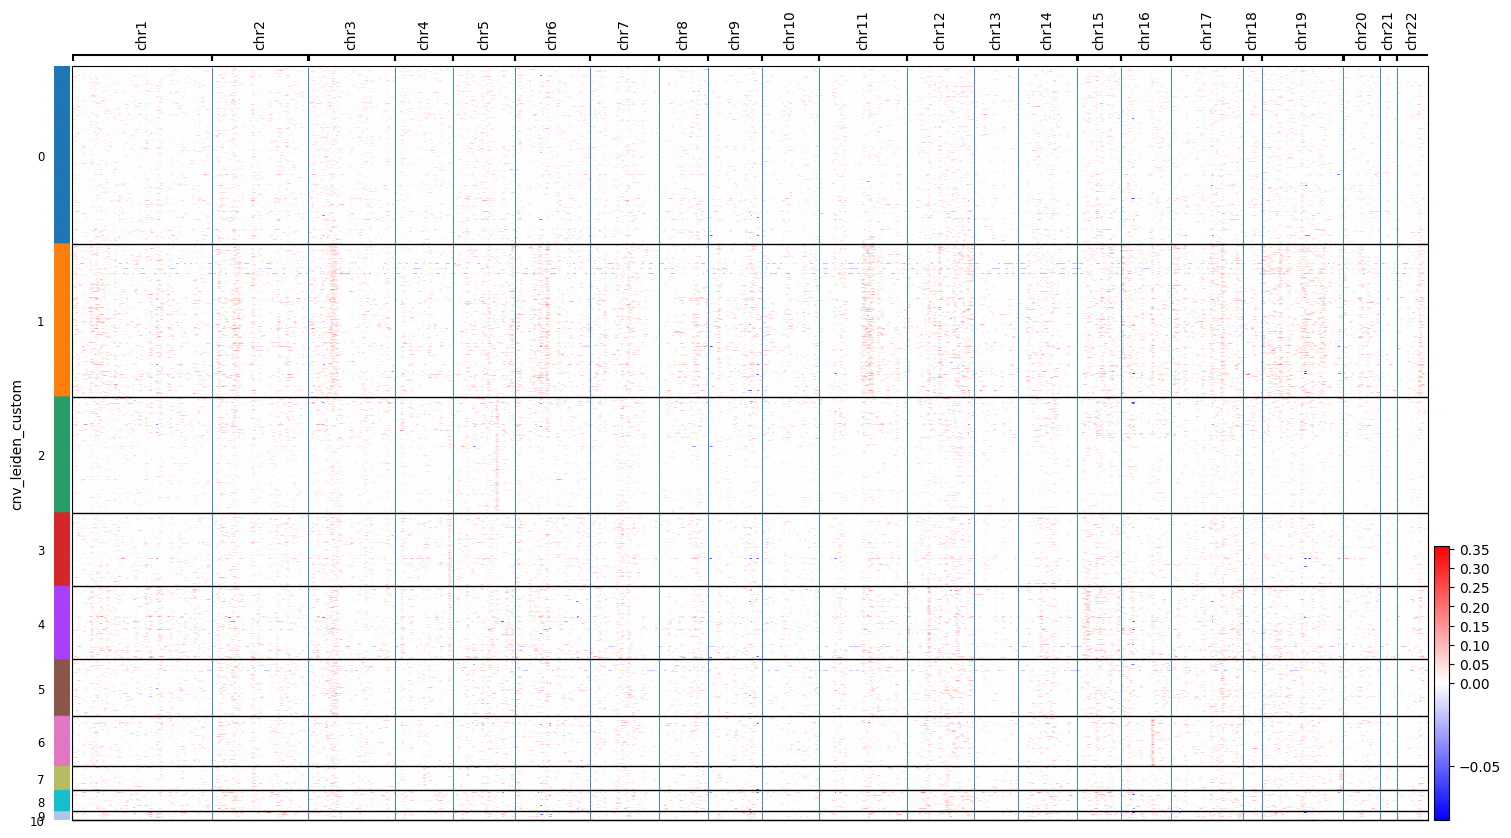

In [88]:
cnv.pl.chromosome_heatmap(
                plot_adata,
                groupby=grouping_key,  # e.g., 'cnv_ref_group' or your preferred cell grouping
                use_rep=cnv_storage_key,  # This should match 'key_added' from tl.infercnv
                cmap='bwr',             # Common colormap for CNVs (blue-white-red)
                figsize=(18, 10),       # Adjust as needed
                # show=True,            # Default behavior is usually to show
                # save="cnv_chromosome_heatmap.pdf" # Uncomment to save
            )

# Step 6: Validate and Refine Tumor/Normal Assignments

In [91]:
cnv_matrix_key = 'X_cnv_windows'
cnv_data_for_scoring = adata.obsm[cnv_matrix_key]

In [92]:
# Calculate CNV activity score: sum of squared CNV values
adata.obs['cnv_activity_score'] = np.sum(np.square(cnv_data_for_scoring), axis=1)

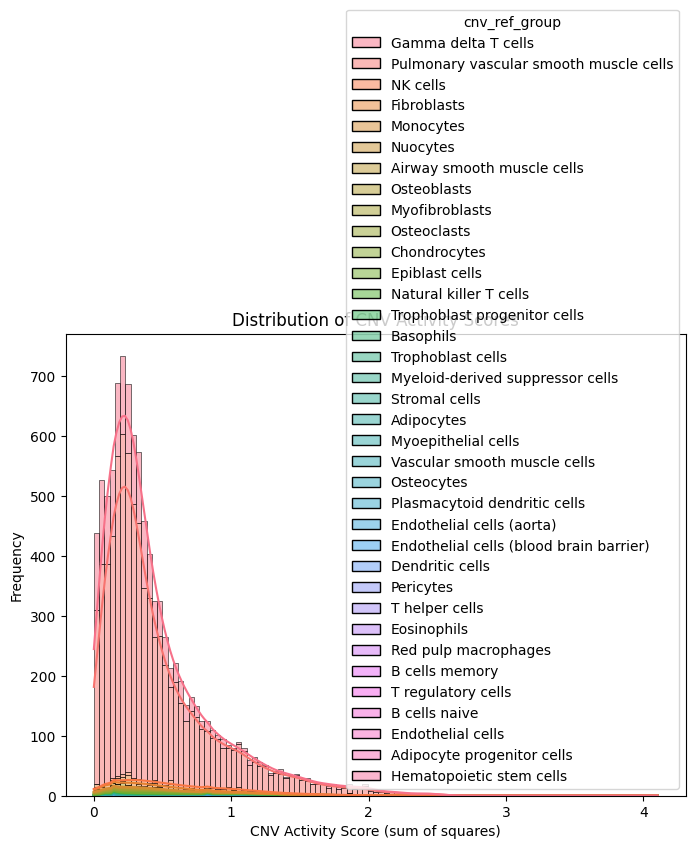

In [93]:
# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=adata.obs, x='cnv_activity_score', hue='cnv_ref_group' if 'cnv_ref_group' in adata.obs else None, kde=True, multiple="stack")
plt.title('Distribution of CNV Activity Scores')
plt.xlabel('CNV Activity Score (sum of squares)')
plt.ylabel('Frequency')
plt.show()

In [94]:
reference_scores = adata.obs.loc[adata.obs['cnv_ref_group'].isin(reference_cell_types), 'cnv_activity_score']

In [96]:
threshold = reference_scores.mean() + 2 * reference_scores.std()

In [97]:
if 'cnv_ref_group' in adata.obs and reference_cell_types:
    is_reference_cell = adata.obs['cnv_ref_group'].isin(reference_cell_types)
    adata.obs.loc[is_reference_cell & (adata.obs['cnv_activity_score'] <= threshold), 'cnv_status'] = 'normal_cnv_ref'
    adata.obs.loc[is_reference_cell & (adata.obs['cnv_activity_score'] > threshold), 'cnv_status'] = 'tumor_cnv_ref_anomalous' # Suspicious reference

In [98]:
adata.obs['cnv_status'] = adata.obs['cnv_status'].astype('category')
print("Distribution of 'cnv_status':")
print(adata.obs['cnv_status'].value_counts())

Distribution of 'cnv_status':
cnv_status
normal_cnv_ref             9291
tumor_cnv_ref_anomalous     545
Name: count, dtype: int64


In [99]:
osteosarcoma_marker_symbols = ['COL1A1', 'CXCL12', 'MEPE', 'COL2A1']
osteosarcoma_markers_present_in_adata = adata.var_names[adata.var['gene_symbol'].isin(osteosarcoma_marker_symbols)].tolist()

In [100]:
osteosarcoma_markers_present_in_adata

['ENSG00000152595', 'ENSG00000107562', 'ENSG00000139219', 'ENSG00000108821']

In [ ]:
# To use gene symbols in plots when var_names are Ensembl IDs, create a temporary mapping for var_names_idx
    # This ensures dotplot/violin plot shows symbols if adata.var_names are not symbols.
    # However, sc.pl.dotplot/violin directly take a list of gene symbols if you pass them to the `var_names` argument
    # and your adata.var['gene_symbol'] is correctly set up.
    # The `groupby` parameter uses adata.obs.
    # sc.pl.dotplot(adata, osteosarcoma_markers_present_in_adata, groupby='cnv_status', title="Osteosarcoma Markers by CNV Status")
    # Better: use symbols directly in var_names for plotting if they exist in adata.var['gene_symbol']


In [ ]:
# sc.pl.dotplot(adata, var_names=osteosarcoma_marker_symbols, groupby='cnv_status', title="Osteosarcoma Markers by CNV Status", use_raw=False)
# sc.pl.violin(adata, var_names=osteosarcoma_marker_symbols, groupby='cnv_status', rotation=90, use_raw=False)

In [102]:
adata

AnnData object with n_obs × n_vars = 9836 × 60319
    obs: 'barcodes', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'total', 'prob_compromised', 'miQC_pass', 'scpca_filter', 'sizeFactor', 'cluster', 'singler_celltype_ontology', 'singler_celltype_annotation', 'cellassign_celltype_annotation', 'cellassign_celltype_ontology', 'cellassign_max_prediction', 'consensus_celltype_annotation', 'consensus_celltype_ontology', 'library_id', 'sample_id', 'scpca_project_id', 'submitter_id', 'participant_id', 'submitter', 'age', 'age_timing', 'sex', 'diagnosis', 'subdiagnosis', 'tissue_location', 'disease_timing', 'organism', 'is_xenograft', 'is_cell_line', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'is_primary_data', 'cnv_ref_group', 'cnv_activity_score', 'cnv_status'
    va

In [104]:
adata.obs.cnv_status

TAGCACAAGGTGCTTT             normal_cnv_ref
TGCTTCGGTCGCCTAG             normal_cnv_ref
CTTCCTTCACGTGAGA             normal_cnv_ref
AACCATGGTGTTGACT             normal_cnv_ref
TATCCTACATGAAAGT             normal_cnv_ref
                             ...           
GGAATGGAGGAGAGGC             normal_cnv_ref
TCTCAGCCAAAGCTCT    tumor_cnv_ref_anomalous
CCGGTAGAGGTAAGAG    tumor_cnv_ref_anomalous
TCTAACTTCACGAACT    tumor_cnv_ref_anomalous
TGAGCATGTCCCGGTA    tumor_cnv_ref_anomalous
Name: cnv_status, Length: 9836, dtype: category
Categories (2, object): ['normal_cnv_ref', 'tumor_cnv_ref_anomalous']

In [105]:
if len(adata.obs['cnv_status'].cat.categories) >= 2 and \
   ('tumor_cnv' in adata.obs['cnv_status'].value_counts() and adata.obs['cnv_status'].value_counts()['tumor_cnv'] > 1) and \
   ('normal_cnv' in adata.obs['cnv_status'].value_counts() and adata.obs['cnv_status'].value_counts()['normal_cnv'] > 1) : # Need at least 2 cells in each group for robust DGE
    print("Step 3.3: Performing DGE between CNV-defined tumor and normal cells")

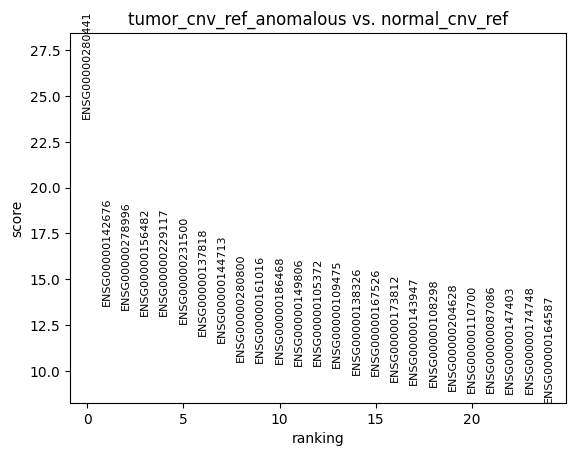

In [106]:
sc.tl.rank_genes_groups(adata, groupby='cnv_status', groups=['tumor_cnv_ref_anomalous'], reference='normal_cnv_ref', method='wilcoxon', key_added='rank_genes_tumor_vs_normal_cnv', use_raw=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='rank_genes_tumor_vs_normal_cnv', title="Top 25 DEGs (Tumor CNV vs Normal CNV)")

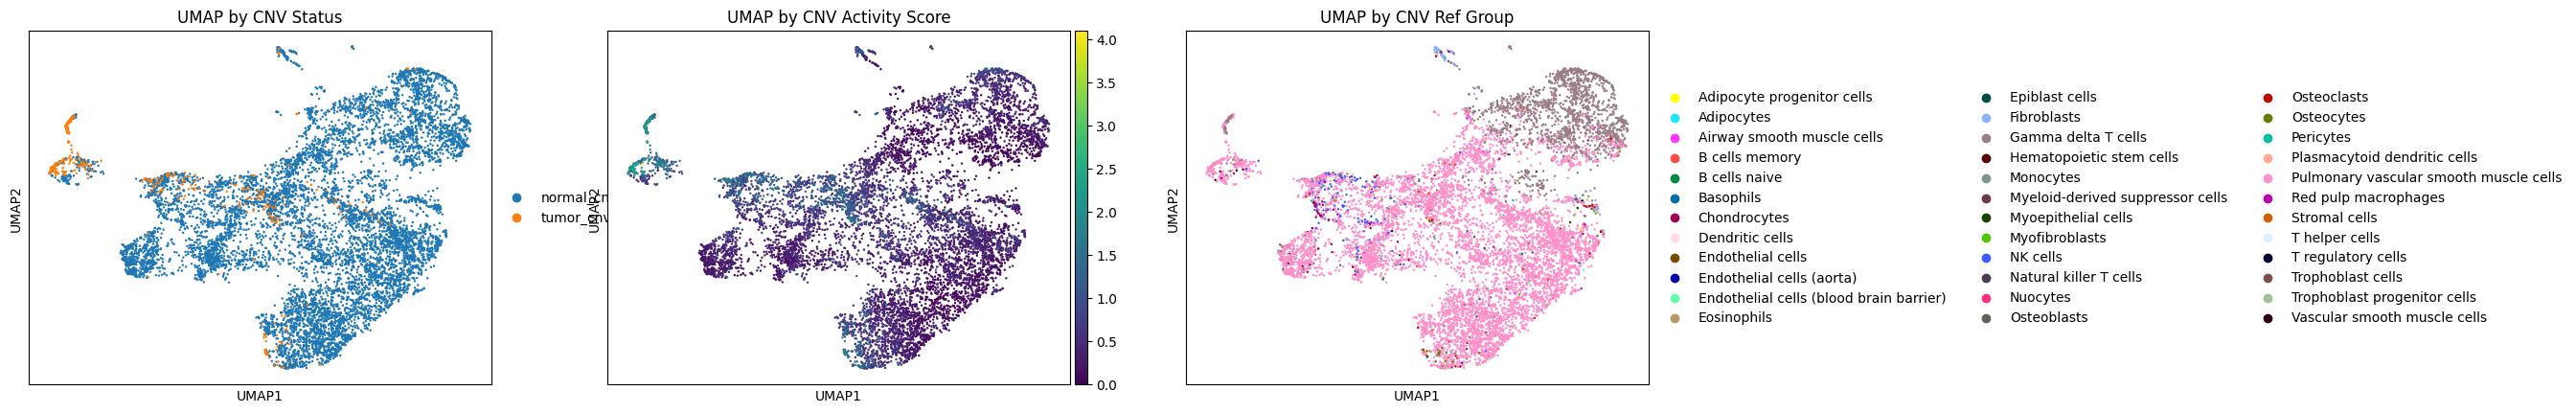

In [107]:
sc.pl.umap(adata, color=['cnv_status', 'cnv_activity_score', 'cnv_ref_group'], title=['UMAP by CNV Status', 'UMAP by CNV Activity Score', 'UMAP by CNV Ref Group'], cmap='viridis')

In [108]:
print("Step 4.1: Subsetting normal cells")
adata_normal = adata[adata.obs['cnv_status'] == 'normal_cnv_ref'].copy()

Step 4.1: Subsetting normal cells


In [109]:
# Re-cluster normal cells [cite: 34]
print("Step 4.2: Re-clustering normal cells")
sc.tl.pca(adata_normal, svd_solver='arpack')
sc.pp.neighbors(adata_normal, n_neighbors=10, n_pcs=min(30, adata_normal.n_obs-1)) # Adjust n_pcs if few cells
sc.tl.umap(adata_normal)
sc.tl.leiden(adata_normal, resolution=0.5, key_added='leiden_normal') # Adjust resolution as needed

Step 4.2: Re-clustering normal cells


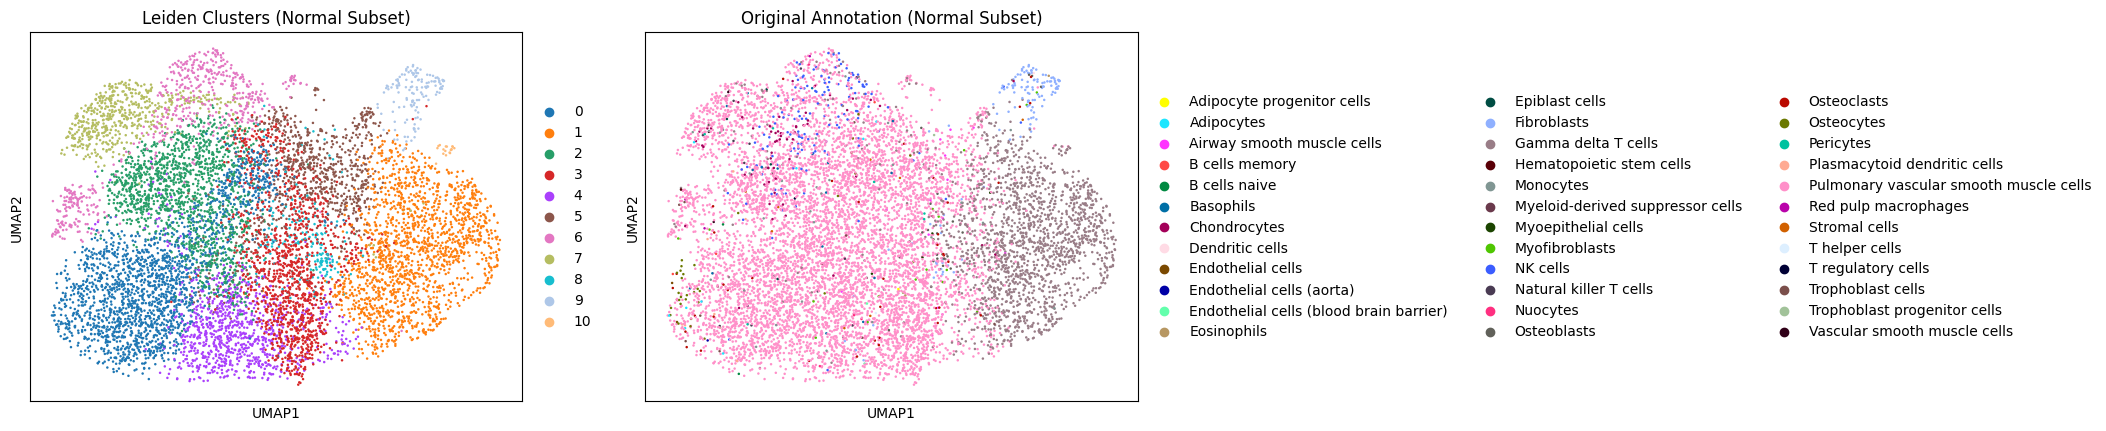

In [111]:
sc.pl.umap(adata_normal, color=['leiden_normal', 'cellassign_celltype_annotation'], title=['Leiden Clusters (Normal Subset)', 'Original Annotation (Normal Subset)'])